In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)

In [67]:
batch_size = 4096

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

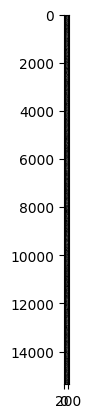

In [68]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


In [69]:
class CNN(nn.Module):
   def __init__(self, in_channels, num_classes):

       """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image (for grayscale images, 1)
           * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
       """
       super(CNN, self).__init__()

       # 1st convolutional layer
       self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
       # Max pooling layer
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # 2nd convolutional layer
       self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
       # Fully connected layer
       self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

   def forward(self, x):
       """
       Define the forward pass of the neural network.

       Parameters:
           x: Input tensor.

       Returns:
           torch.Tensor
               The output tensor after passing through the network.
       """
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x

In [70]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [71]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [72]:
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 15/15 [00:02<00:00,  5.35it/s]


Epoch [2/10]


100%|██████████| 15/15 [00:02<00:00,  5.87it/s]


Epoch [3/10]


100%|██████████| 15/15 [00:02<00:00,  5.86it/s]


Epoch [4/10]


100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Epoch [5/10]


100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Epoch [6/10]


100%|██████████| 15/15 [00:04<00:00,  3.28it/s]


Epoch [7/10]


100%|██████████| 15/15 [00:04<00:00,  3.11it/s]


Epoch [8/10]


100%|██████████| 15/15 [00:02<00:00,  5.86it/s]


Epoch [9/10]


100%|██████████| 15/15 [00:02<00:00,  5.88it/s]


Epoch [10/10]


100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


In [ ]:
from torchmetrics import Accuracy, Precision, Recall

# Set up of multiclass accuracy metric
acc = Accuracy(task="multiclass", num_classes=10).to(device)
prec = Precision(task="multiclass", num_classes=10).to(device)
rec = Recall(task="multiclass", num_classes=10).to(device)

# Iterate over the dataset batches
model.eval()
with torch.no_grad():
   for images, labels in test_loader:
       images, labels = images.to(device), labels.to(device)
       # Get predicted probabilities for test data batch
       outputs = model(images)
       _, preds = torch.max(outputs, 1)
       acc(preds, labels)
       prec(preds, labels)
       rec(preds, labels)

#Compute total test accuracy
test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy}")

# >>> Test accuracy: 0.9857000112533569
# Batch 60:     0.9879000186920166      40s      
# Batch 1024:   0.9768000245094299      32s
# Batch 2048:   0.9638000130653381      26s

Test accuracy: 0.9401000142097473


: 